# x와 y( dc1_capafit) 예측

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from matplotlib import font_manager, rc

In [2]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [3]:
#그래프 옵션 지정
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "NanumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

sns.set_palette('pastel')

In [4]:
df = pd.read_csv("data_fin.csv")
df

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31014,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,16연,13단,3759.2,5.3,7.2,4745.0,37583.0,94.0,643.0,-35.0
31015,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,16연,13단,3759.2,5.3,7.1,4746.0,37583.0,94.0,620.0,89.0
31016,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,16연,13단,3760.3,5.2,7.0,4782.0,37595.0,92.0,597.0,-23.0
31017,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,16연,13단,3760.0,5.3,7.0,4751.0,37590.0,95.0,620.0,3.0


In [5]:
c1_columns = [col for col in df.columns if 'c1' in col]

c1_columns

['c1_tat',
 'dc1_tat',
 'pc1_tat',
 'c1_curr_end',
 'c1_voltage_avg',
 'c1_capa',
 'c1_ccval',
 'c1_time_cc',
 'c1_box_col',
 'c1_box_dan',
 'c1_temp_avg',
 'dc1_curr_end',
 'dc1_voltage_avg',
 'dc1_capa',
 'dc1_box_col',
 'dc1_box_dan',
 'dc1_temp_avg',
 'dc1_capafit',
 'pc1_imp',
 'pc1_voltage_start',
 'pc1_curr_end',
 'pc1_box_col',
 'pc1_box_dan']

In [6]:
dc1_columns = [col for col in df.columns if 'dc1' in col]

dc1_columns

['dc1_tat',
 'dc1_curr_end',
 'dc1_voltage_avg',
 'dc1_capa',
 'dc1_box_col',
 'dc1_box_dan',
 'dc1_temp_avg',
 'dc1_capafit']

In [7]:
c2_columns = [col for col in df.columns if 'c2' in col]

c2_columns

['c2_tat',
 'dc2_tat',
 'c2_curr_end',
 'c2_voltage_avg',
 'c2_capa',
 'c2_ccval',
 'c2_time_cc',
 'c2_box_col',
 'c2_box_dan',
 'c2_temp_avg',
 'dc2_curr_end',
 'dc2_voltage_avg',
 'dc2_capa',
 'dc2_box_col',
 'dc2_box_dan',
 'dc2_temp_avg',
 'dc2_capafit']

In [8]:
dc2_columns = [col for col in df.columns if 'dc2' in col]

dc2_columns

['dc2_tat',
 'dc2_curr_end',
 'dc2_voltage_avg',
 'dc2_capa',
 'dc2_box_col',
 'dc2_box_dan',
 'dc2_temp_avg',
 'dc2_capafit']

In [9]:
c3_columns = [col for col in df.columns if 'c3' in col]

c3_columns

['c3_tat',
 'dc3_tat',
 'c3_curr_end',
 'c3_voltage_avg',
 'c3_capa',
 'c3_ccval',
 'c3_time_cv',
 'c3_cvval',
 'c3_time_cc',
 'c3_box_col',
 'c3_box_dan',
 'c3_temp_avg',
 'dc3_curr_end',
 'dc3_voltage_avg',
 'dc3_capa',
 'dc3_box_col',
 'dc3_box_dan',
 'dc3_temp_avg',
 'dc3_capafit']

In [10]:
dc3_columns = [col for col in df.columns if 'dc3' in col]

dc3_columns

['dc3_tat',
 'dc3_curr_end',
 'dc3_voltage_avg',
 'dc3_capa',
 'dc3_box_col',
 'dc3_box_dan',
 'dc3_temp_avg',
 'dc3_capafit']

In [11]:
c4_columns = [col for col in df.columns if 'c4' in col]

c4_columns

['c4_tat',
 'c4_curr_end',
 'c4_voltage_avg',
 'c4_capa',
 'c4_ccval',
 'c4_time_cv',
 'c4_cvval',
 'c4_time_cc',
 'c4_box_col',
 'c4_box_dan',
 'c4_temp_avg']

## x(c1 공정 변수들)와 y(dc1_capafit) 예측

In [12]:
x= ['c1_curr_end','c1_voltage_avg','c1_ccval','c1_time_cc','c1_temp_avg']
y= 'dc1_capafit'

## GB

In [13]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV


In [14]:
# 설명변수, 목표변수 데이터 구분
df_x = df[['c1_curr_end','c1_voltage_avg','c1_ccval','c1_time_cc','c1_temp_avg']]
df_y = df['dc1_capafit'] 

In [15]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_x, df_y, test_size=0.3, random_state=1234)

print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (31019, 5)
분할 후 설명변수 데이터 :Train (21713, 5)   Test (9306, 5)


In [16]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Score on training set: 0.952
Score on test set: 0.952


In [17]:
# 실행옵션 확인
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
# 최종모델 선택
gb_final = gb_uncustomized 
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.952
Score on test set: 0.952


In [19]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred =gb_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 27614    535
19622    534
30689    536
8494     534
1989     533
18935    546
16691    537
8784     533
3933     536
9852     532
Name: dc1_capafit, dtype: int64
test data의 예측값 : 
 [535.2112633  533.80661455 538.03971479 532.5860787  532.42209652
 544.70656328 537.76597286 533.85818787 536.11509411 533.15427309]


In [20]:
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,c1_temp_avg,0.995
1,c1_voltage_avg,0.003
2,c1_ccval,0.001
3,c1_time_cc,0.001
0,c1_curr_end,0.000


Text(0, 0.5, '변수')

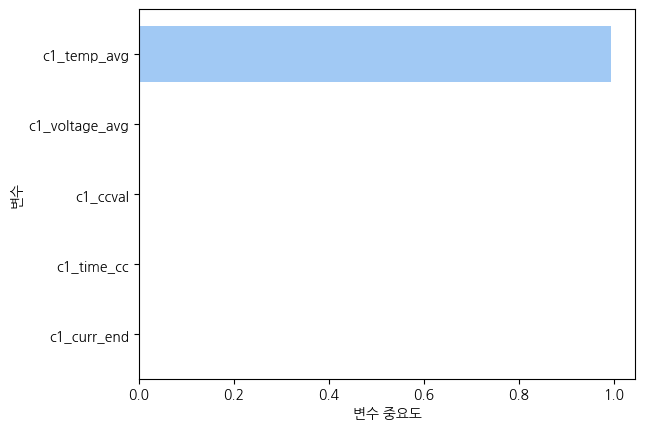

In [21]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## RF

In [22]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [23]:
print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (31019, 5)
분할 후 설명변수 데이터 :Train (21713, 5)   Test (9306, 5)


In [24]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.990
Score on test set: 0.948


In [25]:
# 실행옵션 확인
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [26]:
# 최종 모델
rf_final = rf_uncustomized
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.990
Score on test set: 0.948


In [27]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 27614    535
19622    534
30689    536
8494     534
1989     533
18935    546
16691    537
8784     533
3933     536
9852     532
Name: dc1_capafit, dtype: int64
test data의 예측값 : 
 [534.974      534.03666667 538.0275     533.82       533.75
 545.03       537.774      532.82433333 536.11       533.23      ]


In [28]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
4,c1_temp_avg,0.954
2,c1_ccval,0.018
3,c1_time_cc,0.012
0,c1_curr_end,0.010
1,c1_voltage_avg,0.007


Text(0, 0.5, '설명변수')

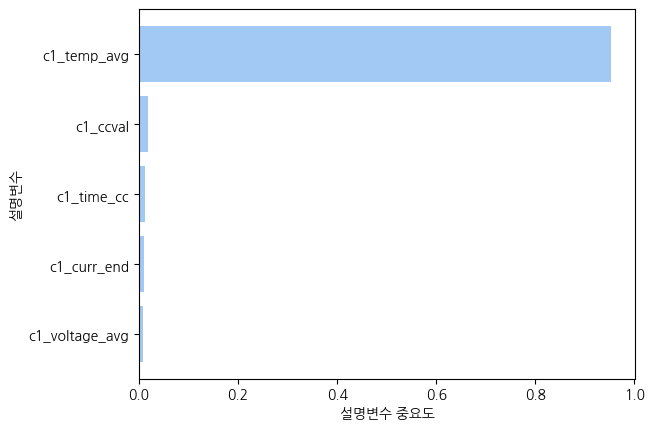

In [29]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## DT

In [30]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [31]:
print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (31019, 5)
분할 후 설명변수 데이터 :Train (21713, 5)   Test (9306, 5)


In [32]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.996
Score on test set: 0.916


In [33]:
# 실행옵션 확인
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [34]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [35]:
#  모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.605,0.600
1,2,0.835,0.839
2,3,0.918,0.919
3,4,0.941,0.942
4,5,0.947,0.948
5,6,0.950,0.950
6,7,0.952,0.951
7,8,0.954,0.952
8,9,0.957,0.951
9,10,0.960,0.950


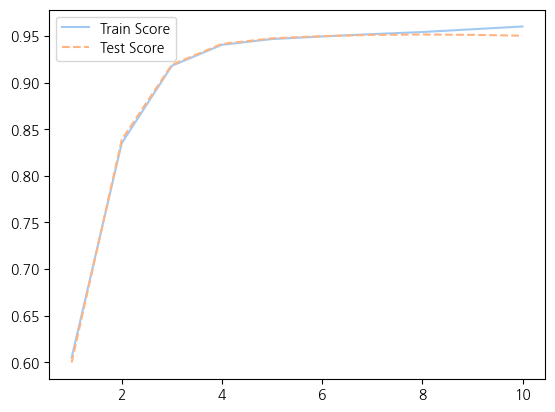

In [36]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

의사결정나무 깊이 개수: 3

In [39]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(random_state=1234, max_depth = 3)
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [40]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 27614    535
19622    534
30689    536
8494     534
1989     533
18935    546
16691    537
8784     533
3933     536
9852     532
Name: dc1_capafit, dtype: int64
test data의 예측값 : 
 [534.9122807  533.02104748 538.2996676  533.02104748 533.02104748
 545.78471139 538.2996676  533.02104748 536.29705972 533.02104748]


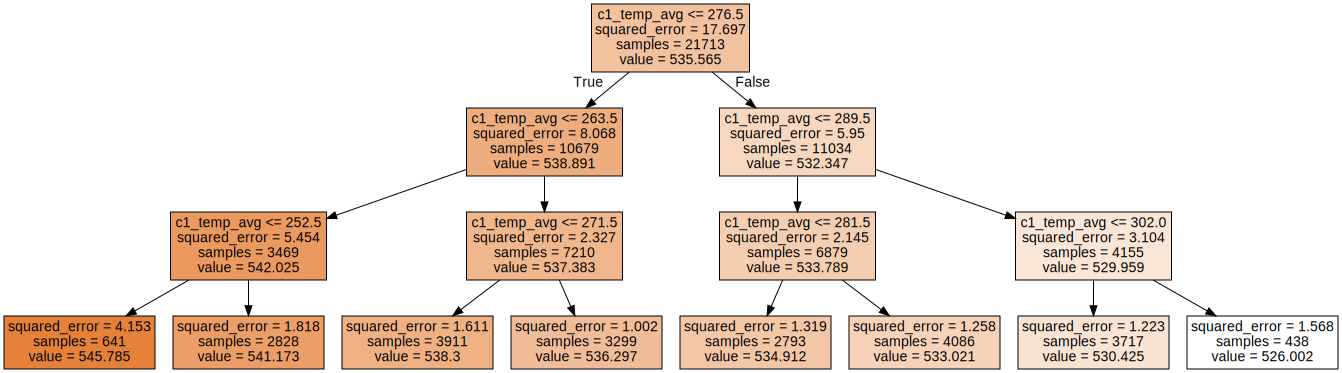

<Figure size 700x700 with 0 Axes>

In [41]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
       dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))


In [42]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,c1_temp_avg,1.0
0,c1_curr_end,0.0
1,c1_voltage_avg,0.0
2,c1_ccval,0.0
3,c1_time_cc,0.0


Text(0, 0.5, '변수')

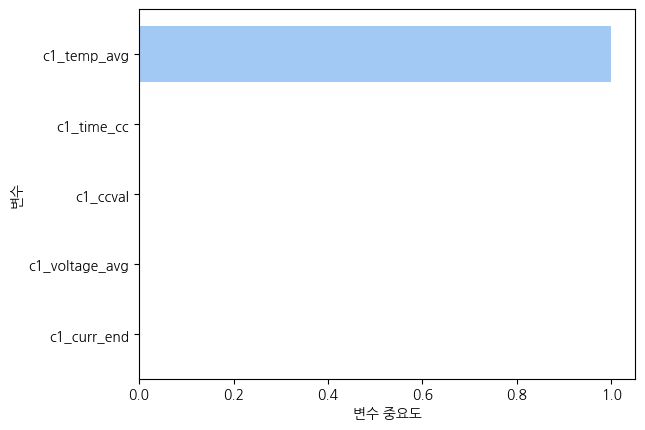

In [43]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 모델평가

In [44]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [45]:
# 모델 리스트, 그래프를 그리기 생성 목적
models = [ "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 의사결정나무예측
dt_y_pred = tree_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [46]:
# 결과 출력
for i, model in enumerate(models):
    print(f"Model: {model}")
    print(f"MSE: {mse[i]:.4f}")
    print(f"RMSE: {rmse[i]:.4f}")
    print(f"MAE: {mae[i]:.4f}")
    print(f"MAPE: {mape[i]:.4f}")
    print("\n")

Model: 의사결정나무
MSE: 1.4585
RMSE: 1.2077
MAE: 0.9393
MAPE: 0.0018


Model: 랜덤 포레스트
MSE: 0.9480
RMSE: 0.9737
MAE: 0.7485
MAPE: 0.0014


Model: 그래디언트 부스팅
MSE: 0.8627
RMSE: 0.9288
MAE: 0.7200
MAPE: 0.0013




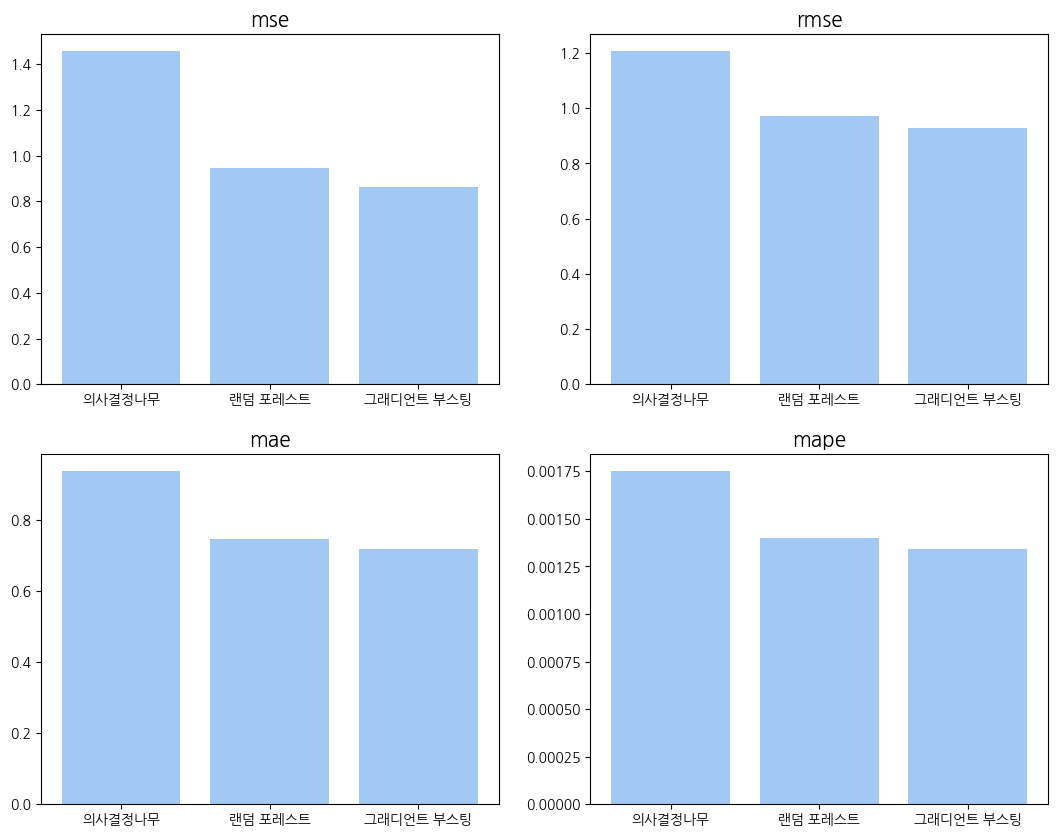

In [47]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

mse: 그래디언트 부스팅 < 랜덤 포레스트 < 의사결정나무  
rmse: 그래디언트 부스팅 < 랜덤 포레스트 < 의사결정나무   
mae: 그래디언트 부스팅 < 랜덤 포레스트  < 의사결정나무   
mape: 그래디언트 부스팅 < 랜덤 포레스트  < 의사결정나무  

## x(c1,dc1 공정 변수들)과 y(dc1_capafit) 예측

In [49]:
x= ['c1_curr_end','c1_voltage_avg','c1_ccval','c1_time_cc','c1_temp_avg','dc1_curr_end','dc1_voltage_avg','dc1_temp_avg']
y= 'dc1_capafit'

### GB

In [50]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV


In [51]:
# 설명변수, 목표변수 데이터 구분
df_x = df[['c1_curr_end','c1_voltage_avg','c1_ccval','c1_time_cc','c1_temp_avg','dc1_curr_end','dc1_voltage_avg','dc1_temp_avg']]
df_y = df['dc1_capafit'] 

In [52]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_x, df_y, test_size=0.3, random_state=1234)

print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (31019, 8)
분할 후 설명변수 데이터 :Train (21713, 8)   Test (9306, 8)


In [53]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Score on training set: 0.993
Score on test set: 0.993


In [54]:
# 실행옵션 확인
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [55]:
# 최종모델 선택
gb_final = gb_uncustomized 
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.993
Score on test set: 0.993


In [56]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred =gb_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 27614    535
19622    534
30689    536
8494     534
1989     533
18935    546
16691    537
8784     533
3933     536
9852     532
Name: dc1_capafit, dtype: int64
test data의 예측값 : 
 [535.11293449 534.06082688 536.06061108 534.05173536 533.01370184
 545.49423014 537.50689833 533.54455244 536.81541545 532.45053436]


In [57]:
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,dc1_temp_avg,0.993
4,c1_temp_avg,0.004
5,dc1_curr_end,0.003
0,c1_curr_end,0.000
2,c1_ccval,0.000
3,c1_time_cc,0.000
6,dc1_voltage_avg,0.000
1,c1_voltage_avg,0.000


Text(0, 0.5, '변수')

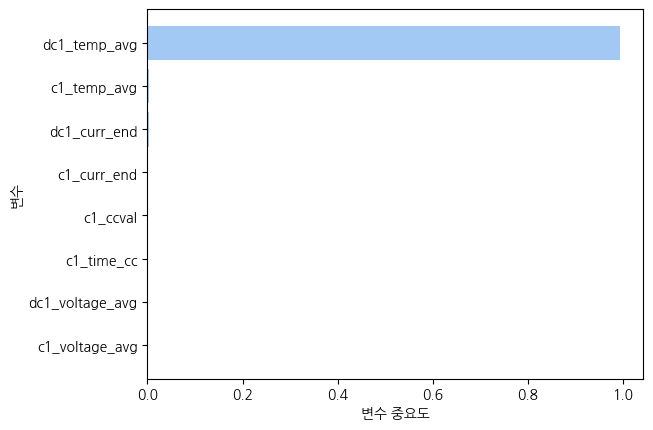

In [58]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### RF

In [59]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [60]:
print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (31019, 8)
분할 후 설명변수 데이터 :Train (21713, 8)   Test (9306, 8)


In [61]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.999
Score on test set: 0.992


In [62]:
# 실행옵션 확인
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [63]:
# 최종 모델
rf_final = rf_uncustomized
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.999
Score on test set: 0.992


In [64]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 27614    535
19622    534
30689    536
8494     534
1989     533
18935    546
16691    537
8784     533
3933     536
9852     532
Name: dc1_capafit, dtype: int64
test data의 예측값 : 
 [535.   534.   536.03 534.   533.   545.54 537.63 533.56 536.58 532.5 ]


In [65]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
7,dc1_temp_avg,0.985
4,c1_temp_avg,0.006
5,dc1_curr_end,0.003
2,c1_ccval,0.002
3,c1_time_cc,0.001
0,c1_curr_end,0.001
6,dc1_voltage_avg,0.001
1,c1_voltage_avg,0.001


Text(0, 0.5, '설명변수')

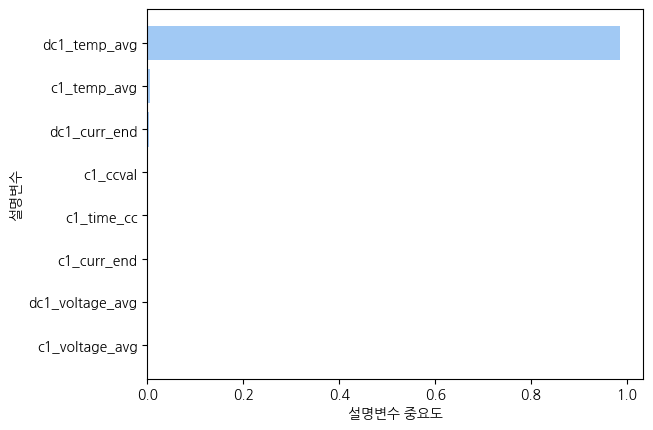

In [66]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### DT

In [71]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [72]:
print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (31019, 8)
분할 후 설명변수 데이터 :Train (21713, 8)   Test (9306, 8)


In [73]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.985


In [74]:
# 실행옵션 확인
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [75]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [76]:
#  모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.633,0.627
1,2,0.873,0.873
2,3,0.958,0.957
3,4,0.984,0.984
4,5,0.991,0.991
5,6,0.992,0.992
6,7,0.993,0.992
7,8,0.993,0.992
8,9,0.993,0.992
9,10,0.993,0.992


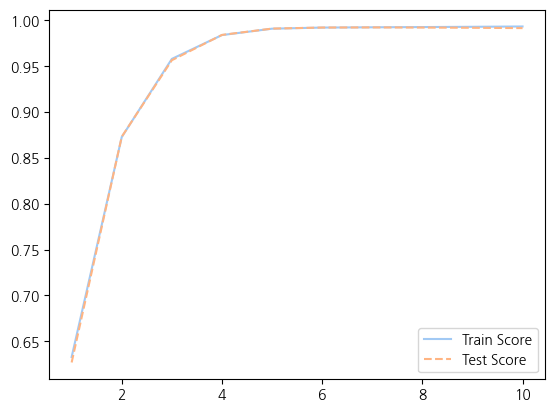

In [77]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

의사결정나무 깊이: 3

In [78]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(random_state=1234, max_depth = 3)
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [79]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 27614    535
19622    534
30689    536
8494     534
1989     533
18935    546
16691    537
8784     533
3933     536
9852     532
Name: dc1_capafit, dtype: int64
test data의 예측값 : 
 [534.7386423  534.7386423  536.62098139 534.7386423  532.71874026
 544.98367347 536.62098139 532.71874026 536.62098139 532.71874026]


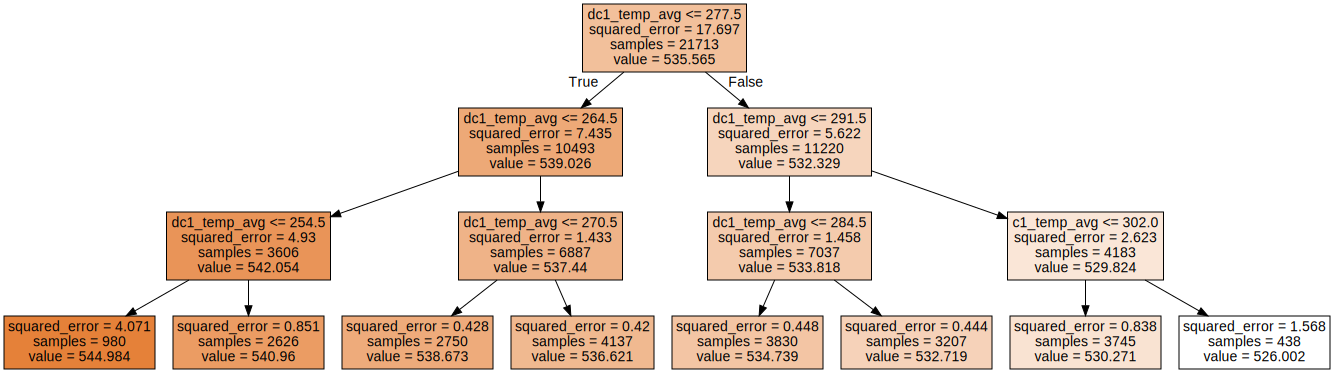

<Figure size 700x700 with 0 Axes>

In [80]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))

In [81]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,dc1_temp_avg,0.981
4,c1_temp_avg,0.019
0,c1_curr_end,0.000
1,c1_voltage_avg,0.000
2,c1_ccval,0.000
3,c1_time_cc,0.000
5,dc1_curr_end,0.000
6,dc1_voltage_avg,0.000


Text(0, 0.5, '변수')

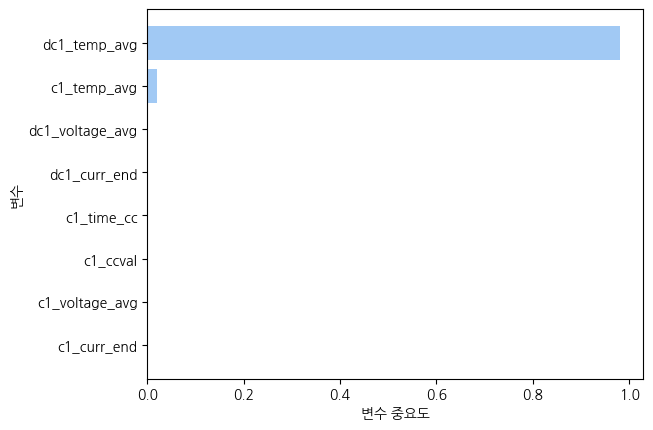

In [82]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 모델평가

In [83]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [84]:
# 모델 리스트, 그래프를 그리기 생성 목적
models = [ "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 의사결정나무예측
dt_y_pred = tree_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [85]:
# 결과 출력
for i, model in enumerate(models):
    print(f"Model: {model}")
    print(f"MSE: {mse[i]:.3f}")
    print(f"RMSE: {rmse[i]:.3f}")
    print(f"MAE: {mae[i]:.3f}")
    print(f"MAPE: {mape[i]:}")
    print("\n")


Model: 의사결정나무
MSE: 0.784
RMSE: 0.885
MAE: 0.697
MAPE: 0.0012989200891016669


Model: 랜덤 포레스트
MSE: 0.151
RMSE: 0.388
MAE: 0.270
MAPE: 0.0005043677620084572


Model: 그래디언트 부스팅
MSE: 0.134
RMSE: 0.366
MAE: 0.269
MAPE: 0.000502216084841016




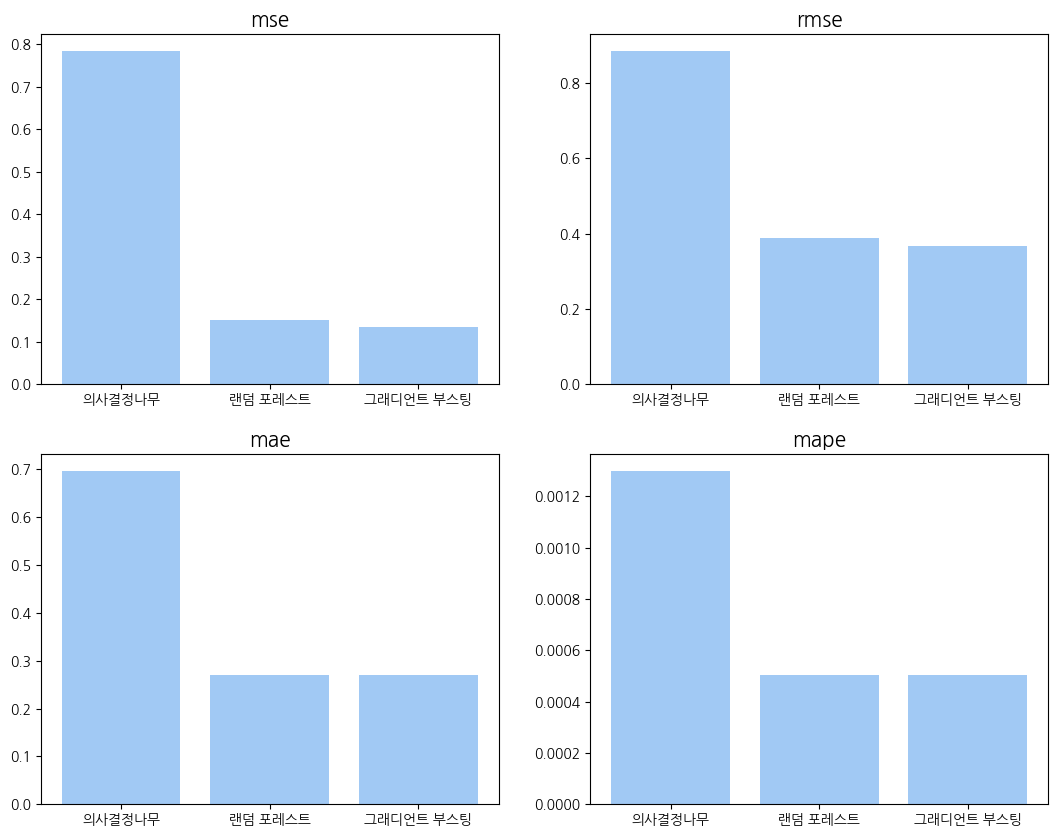

In [86]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

mse: 그래디언트 부스팅 < 랜덤 포레스트 < 의사결정나무  
rmse: 그래디언트 부스팅 < 랜덤 포레스트 < 의사결정나무  
mae: 그래디언트 부스팅 < 랜덤 포레스트  < 의사결정나무
mape: 그래디언트 부스팅 < 랜덤 포레스트 < 의사결정나무